**#0 Importy i wczytanie bazy**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**#1 Histogram**

In [3]:
fare_values = df.loc[df['Fare'].notnull(), 'Fare'].values

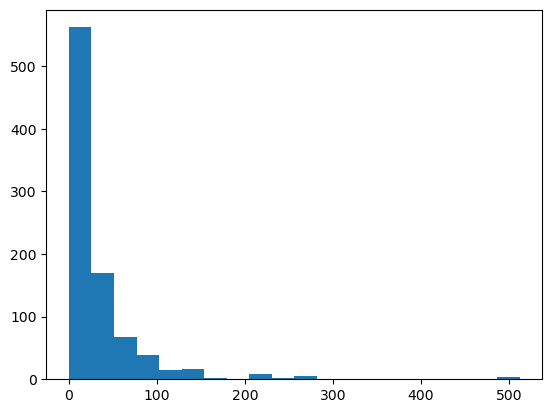

In [33]:
plt.hist(fare_values, bins=20)
plt.show()

**#2 Średnia, Mediana, Moda, Kwartyle**

In [14]:
#Średnia
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


In [15]:
#Mediana
median_fare = np.median(fare_values)
print(median_fare)

14.4542


In [34]:
#Moda
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=8.05, count=43)


In [35]:
#Kwartyle
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


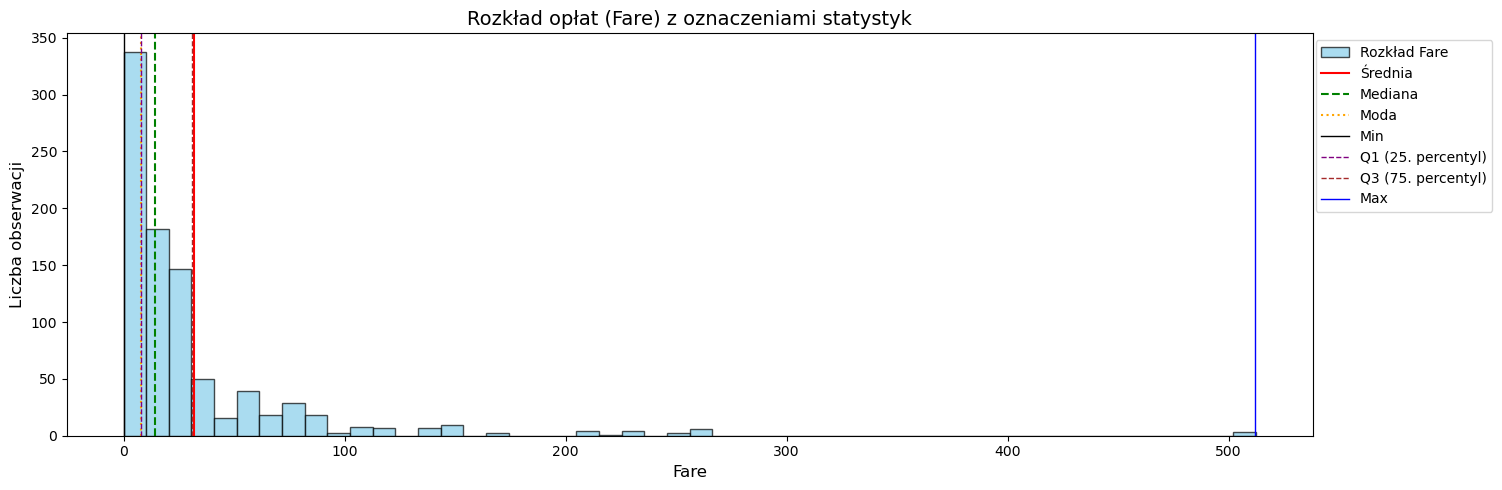

In [36]:
#Wykres
plt.figure(figsize=(15, 5))
plt.hist(fare_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Rozkład Fare')

#Linie pionowe dla statystyk
plt.axvline(x=mean_fare, color='red', linestyle='-', linewidth=1.5, label='Średnia')
plt.axvline(x=median_fare, color='green', linestyle='--', linewidth=1.5, label='Mediana')
plt.axvline(x=mode_fare[0], color='orange', linestyle=':', linewidth=1.5, label='Moda')
plt.axvline(x=q0, color='black', linestyle='-', linewidth=1, label='Min')
plt.axvline(x=q1, color='purple', linestyle='--', linewidth=1, label='Q1 (25. percentyl)')
plt.axvline(x=q3, color='brown', linestyle='--', linewidth=1, label='Q3 (75. percentyl)')
plt.axvline(x=q4, color='blue', linestyle='-', linewidth=1, label='Max')

#Dodanie tytułu i opisów osi
plt.title('Rozkład opłat (Fare) z oznaczeniami statystyk', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Liczba obserwacji', fontsize=12)
#Dodanie legendy
plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))
plt.tight_layout()
#Wyświetlenie wykresu
plt.show()

**#3 Zakres, Rozstęp międzykwartylowy - IQR, Wariancja, Odchylenie standardowe, Asymetria rozkładu**

In [41]:
#Zakres
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


In [42]:
#Rozstęp międzykwartylowy - IQR
iqr = q3 - q1
print(iqr)

23.0


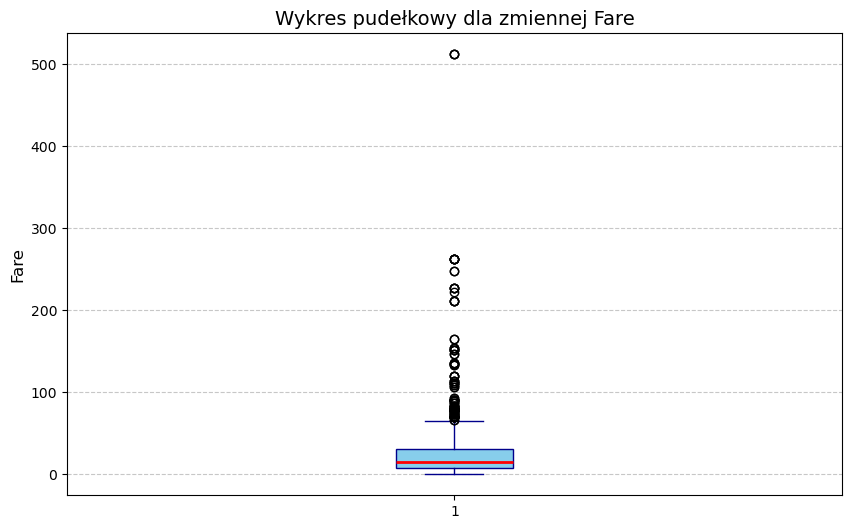

In [43]:
plt.figure(figsize=(10, 6))

# Wykres pudełkowy
plt.boxplot(fare_values, 
            patch_artist=True,  # Wypełnij pudełka kolorem
            boxprops=dict(facecolor='skyblue', color='darkblue'),  # Kolor pudełka i jego krawędzi
            whiskerprops=dict(color='darkblue'),  # Kolor "wąsów"
            capprops=dict(color='darkblue'),  # Kolor zakończeń "wąsów"
            medianprops=dict(color='red', linewidth=2))  # Kolor i grubość linii mediany

# Dodanie opisu osi i tytułu
plt.title('Wykres pudełkowy dla zmiennej Fare', fontsize=14)
plt.ylabel('Fare', fontsize=12)

# Wyświetlenie kratki
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

In [44]:
#Wariancja
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


In [45]:
#Odchylenie standardowe
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


In [46]:
#Asymetria rozkładu
asymmetry_fare = skew(fare_values)
print(asymmetry_fare)

4.7792532923723545


**#4 Skalowanie zmiennej**

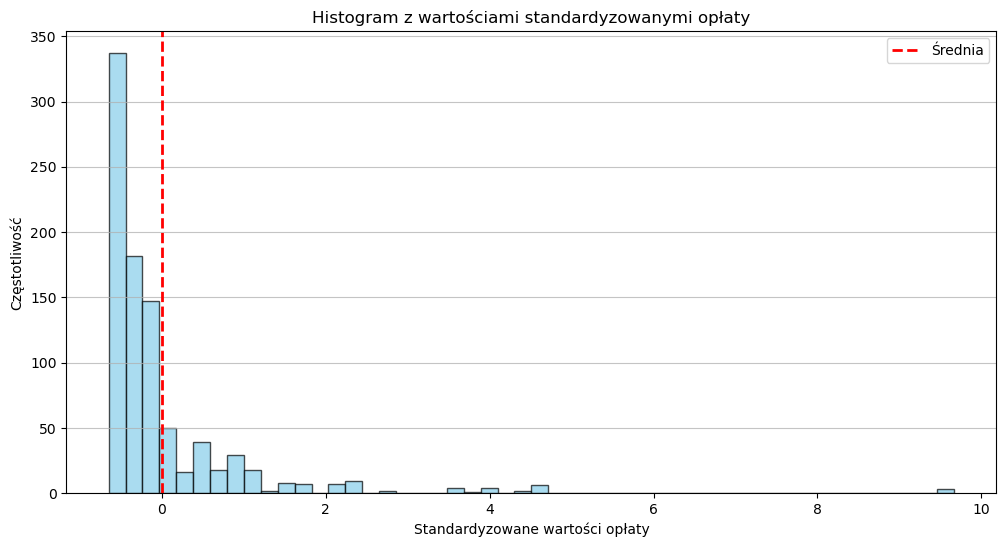

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [51]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))

#Wykres histogramu
plt.figure(figsize=(12, 6))
plt.hist(standardized_fare_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(x = standardized_fare_values.mean(), color='red', linestyle='--', linewidth=2, label='Średnia')

#Etykiety osi i tytuł
plt.xlabel('Standardyzowane wartości opłaty')
plt.ylabel('Częstotliwość')
plt.title('Histogram z wartościami standardyzowanymi opłaty')

# Dodanie legendy
plt.legend(loc='upper right')

# Wyświetlenie wykresu
plt.grid(axis='y', alpha=0.75)  
plt.show()

print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

**#5 Korelacja**

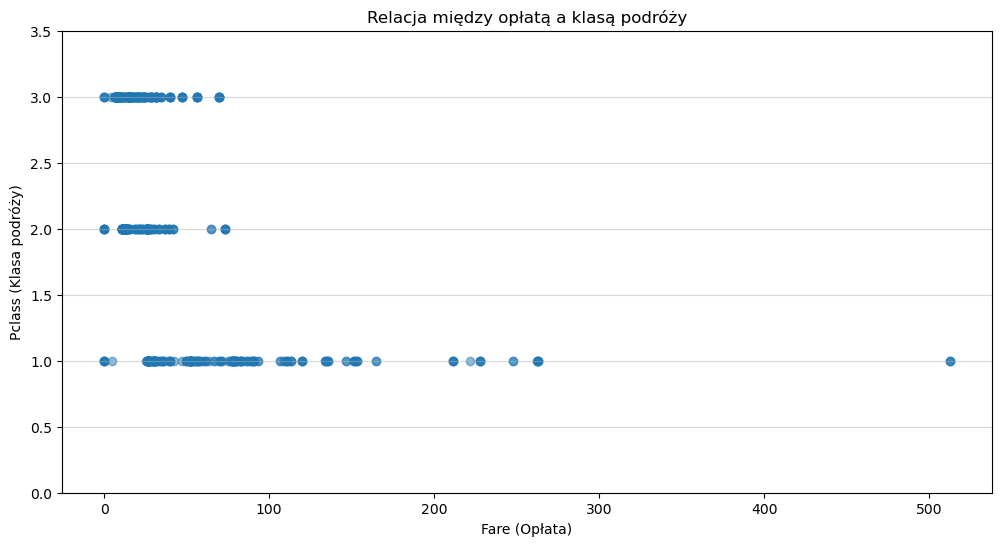

In [62]:
pclass_values = df.loc[df['Fare'].notnull(), 'Pclass'].values

# Wykres punktowy
plt.figure(figsize=(12, 6))
plt.scatter(x=fare_values, y=pclass_values, alpha=0.5)

# Etykiety osi
plt.xlabel('Fare (Opłata)')
plt.ylabel('Pclass (Klasa podróży)')

# Tytuł wykresu
plt.title('Relacja między opłatą a klasą podróży')

# Ustawienie wartości na osi y co 0.5
y_max = np.max(pclass_values) + 1  
plt.yticks(np.arange(0, y_max, 0.5))

# Wyświetlenie wykresu
plt.grid(axis='y', alpha=0.5)  
plt.show()

In [63]:
stats.pearsonr(fare_values, pclass_values)

PearsonRResult(statistic=-0.5494996199439077, pvalue=1.967386173422602e-71)

**Jak widać na powyższym wykresie istnieje korelacja między opłatą a klasą podróży**